<a href="https://colab.research.google.com/github/LeBoysHub/machine_learn/blob/main/exp3a%26b_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving salaries.csv to salaries.csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['salaries.csv']))
df
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')

target = df['salary_more_then_100k']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs_n = inputs.drop(['company','job','degree'],axis='columns')


In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(inputs_n, target)

model.score(inputs_n,target)

model.predict([[2,1,0]])

model.predict([[2,1,1]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

exp 3 b Write a program to demonstrate the working of the decision tree based(Random Forest)algorithm.

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

%matplotlib inline
import matplotlib.pyplot as plt


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


<Figure size 640x480 with 0 Axes>

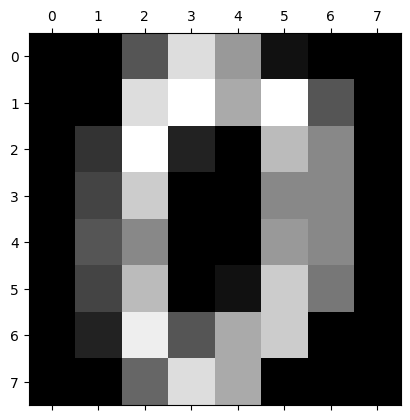

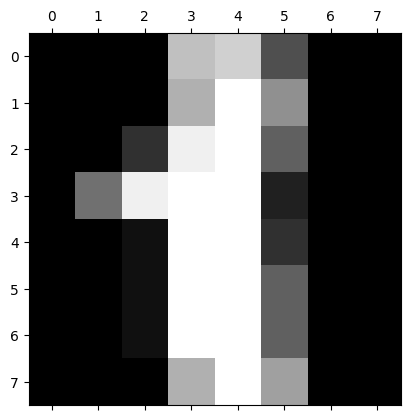

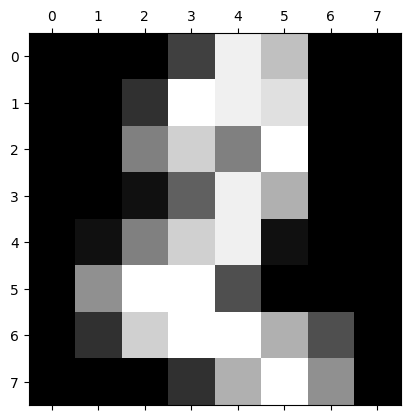

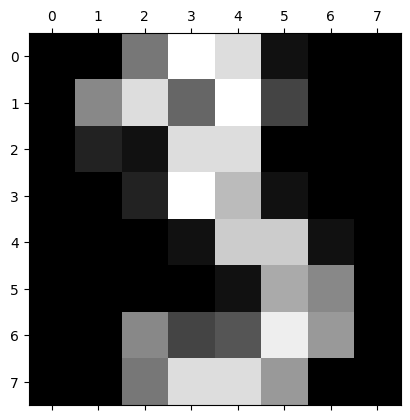

In [ ]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

df = pd.DataFrame(digits.data)
df.head()

In [ ]:
df['target'] = digits.target

df[0:12]

X = df.drop('target',axis='columns')
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

model.score(X_test, y_test)

y_predicted = model.predict(X_test)


Text(95.72222222222221, 0.5, 'Truth')

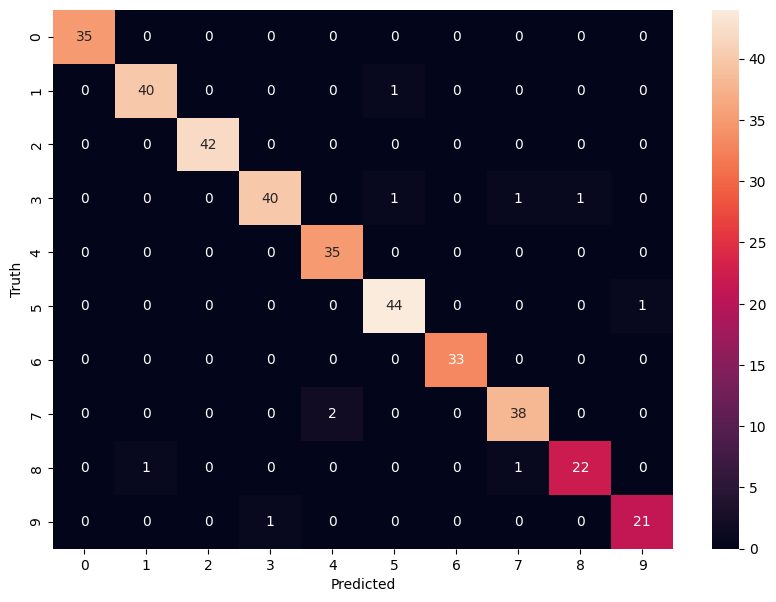

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')